In [27]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
train=pd.read_csv(r'G:\Edvancer\Python module\Project\project3\counterfeit_train.csv')

In [3]:
test=pd.read_csv(r'G:\Edvancer\Python module\Project\project3\counterfeit_test.csv')

In [7]:
train.head()

,Medicine_ID,Counterfeit_Weight,DistArea_ID,Active_Since,Medicine_MRP,Medicine_Type,SidEffect_Level,Availability_rating,Area_Type,Area_City_Type,Area_dist_level,Counterfeit_Sales
0,RRA15,13.100,Area046,1995,160.2366,Antimalarial,critical,0.070422,DownTown,Tier 1,Small,1775.5026
1,YVV26,NaN,Area027,1983,110.4384,Mstablizers,mild,0.013000,CityLimits,Tier 3,Medium,3069.1520
2,LJC15,9.025,Area046,1995,259.4092,Cardiac,mild,0.060783,DownTown,Tier 1,Small,2603.0920
3,GWC40,11.800,Area046,1995,99.9830,OralContraceptives,mild,0.065555,DownTown,Tier 1,Small,1101.7130
4,QMN13,NaN,Area019,1983,56.4402,Hreplacements,critical,0.248859,MidTownResidential,Tier 1,Small,158.9402


In [8]:
test['Counterfeit_Weight'].mean()

14.32860440340908

## Splitting train dataset further so that we can test our model there

In [14]:
from sklearn.model_selection import train_test_split
df_train,df_test=train_test_split(train,test_size=0.2,random_state=1)

In [15]:
x_train=df_train.drop('Counterfeit_Sales',axis=1)
y_train=df_train['Counterfeit_Sales']
x_test=df_test.drop('Counterfeit_Sales',axis=1)
y_test=df_test['Counterfeit_Sales']

# EDA

In [13]:
print(train.shape,test.shape)

(6818, 12) (1705, 11)


In [4]:
train.isnull().sum()

Medicine_ID               0
Counterfeit_Weight     1166
DistArea_ID               0
Active_Since              0
Medicine_MRP              0
Medicine_Type             0
SidEffect_Level           0
Availability_rating       0
Area_Type                 0
Area_City_Type            0
Area_dist_level           0
Counterfeit_Sales         0
dtype: int64

In [8]:
test.isnull().sum() #The actual test dataset

Medicine_ID              0
Counterfeit_Weight     297
DistArea_ID              0
Active_Since             0
Medicine_MRP             0
Medicine_Type            0
SidEffect_Level          0
Availability_rating      0
Area_Type                0
Area_City_Type           0
Area_dist_level          0
dtype: int64

In [16]:
print(x_train['Counterfeit_Weight'].mean(),x_train['Counterfeit_Weight'].median())

14.111170801949946 13.8


In [20]:
for i in x_train.columns:
    print(i,x_train[i].dtypes,x_train[i].nunique())

Medicine_ID object 1541
Counterfeit_Weight float64 408
DistArea_ID object 10
Active_Since int64 9
Medicine_MRP float64 4311
Medicine_Type object 16
SidEffect_Level object 2
Availability_rating float64 5068
Area_Type object 4
Area_City_Type object 3
Area_dist_level object 4


In [37]:
x_train['Medicine_Type'].value_counts()

Hreplacements         797
Antibiotics           774
OralContraceptives    573
Antiseptics           549
Antipyretics          426
Cardiac               420
Mstablizers           408
Tranquilizers         339
Antimalarial          277
Analgesics            272
Antacids              163
Statins               140
MuscleRelaxants       115
Antifungal             84
Stimulants             77
Antiviral              40
Name: Medicine_Type, dtype: int64

In [25]:
df.DistArea_ID.value_counts()

Area013    932
Area046    930
Area035    930
Area049    930
Area045    929
Area018    928
Area017    926
Area010    555
Name: DistArea_ID, dtype: int64

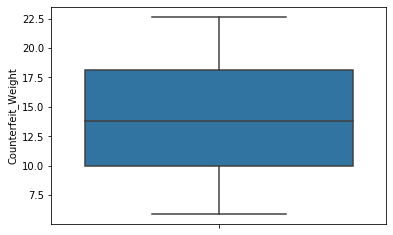

In [21]:
sns.boxplot(y='Counterfeit_Weight',data=x_train)

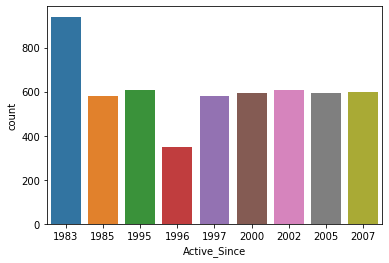

In [23]:
sns.countplot(x='Active_Since',data=x_train)

[Text(0, 0, 'Hreplacements'),
 Text(0, 0, 'Antibiotics'),
 Text(0, 0, 'OralContraceptives'),
 Text(0, 0, 'Antiseptics'),
 Text(0, 0, 'Antipyretics'),
 Text(0, 0, 'Cardiac'),
 Text(0, 0, 'Mstablizers'),
 Text(0, 0, 'Tranquilizers'),
 Text(0, 0, 'Antimalarial'),
 Text(0, 0, 'Analgesics'),
 Text(0, 0, 'Antacids'),
 Text(0, 0, 'Statins'),
 Text(0, 0, 'MuscleRelaxants'),
 Text(0, 0, 'Antifungal'),
 Text(0, 0, 'Stimulants'),
 Text(0, 0, 'Antiviral')]

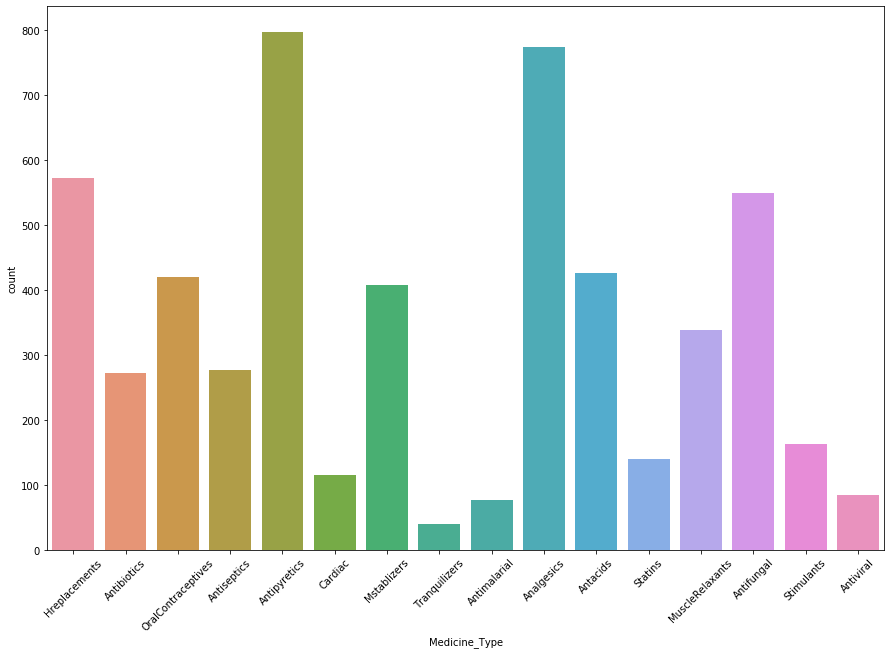

In [38]:
a4_dims = (15, 10)
fig, ax = plt.subplots(figsize=a4_dims)
g=sns.countplot(ax=ax,x='Medicine_Type',data=x_train)
g.set_xticklabels(labels=['Hreplacements','Antibiotics','OralContraceptives','Antiseptics','Antipyretics','Cardiac','Mstablizers','Tranquilizers','Antimalarial','Analgesics','Antacids','Statins','MuscleRelaxants','Antifungal','Stimulants','Antiviral'],rotation=45)

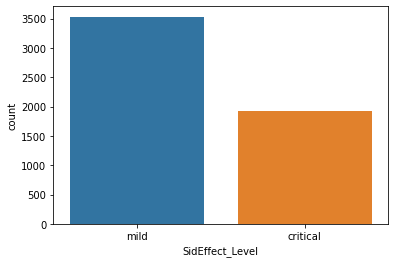

In [39]:
sns.countplot(x_train['SidEffect_Level'])

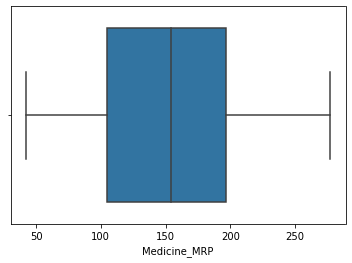

In [40]:
sns.boxplot(x_train['Medicine_MRP'])

# Data Cleaning and Preprocessing

In [ ]:
# Note:
# Impute null values with mean/median
# Drop Medicine_ID column
# Make dummies of all the object column
# create dummy of year column

In [41]:
df_train.drop(['Medicine_ID'],inplace=True,axis=1)
df_test.drop(['Medicine_ID'],inplace=True,axis=1)
test.drop(['Medicine_ID'],inplace=True,axis=1)

C:\Users\Lenovo\Anaconda3\lib\site-packages\pandas\core\frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [42]:
df_train['Counterfeit_Weight']=df_train['Counterfeit_Weight'].fillna(df_train['Counterfeit_Weight'].mean())
df_test['Counterfeit_Weight']=df_test['Counterfeit_Weight'].fillna(df_test['Counterfeit_Weight'].mean())
test['Counterfeit_Weight']=test['Counterfeit_Weight'].fillna(test['Counterfeit_Weight'].mean())

C:\Users\Lenovo\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\Lenovo\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [44]:
for i in df_train.columns:
    if(df_train[i].dtype=='object'):
        dummy=pd.get_dummies(df_train[i],drop_first=True,prefix=i)
        df_train=pd.concat([df_train,dummy],axis=1)
        del df_train[i]
del dummy

In [45]:
for i in df_test.columns:
    if(df_test[i].dtype=='object'):
        dummy=pd.get_dummies(df_test[i],drop_first=True,prefix=i)
        df_test=pd.concat([df_test,dummy],axis=1)
        del df_test[i]
del dummy

In [47]:
for i in test.columns:
    if(test[i].dtype=='object'):
        dummy=pd.get_dummies(test[i],drop_first=True,prefix=i)
        test=pd.concat([test,dummy],axis=1)
        del test[i]
del dummy

In [46]:
df_train.columns.difference(df_test.columns).tolist()

[]

In [48]:
df_train.columns.difference(test.columns).tolist()

['Counterfeit_Sales']

In [62]:
df.columns

Index(['Counterfeit_Weight', 'Active_Since', 'Medicine_MRP', 'Medicine_Type',
       'Availability_rating', 'Counterfeit_Sales', 'data',
       'DistArea_ID_Area010', 'DistArea_ID_Area013', 'DistArea_ID_Area017',
       'DistArea_ID_Area018', 'DistArea_ID_Area035', 'DistArea_ID_Area045',
       'DistArea_ID_Area046', 'DistArea_ID_Area049',
       'SidEffect_Level_critical', 'SidEffect_Level_mild',
       'Area_Type_DownTown', 'Area_Type_Industrial',
       'Area_Type_MidTownResidential', 'Area_City_Type_Tier 1',
       'Area_City_Type_Tier 2', 'Area_City_Type_Tier 3',
       'Area_dist_level_High', 'Area_dist_level_Medium',
       'Area_dist_level_Small', 'Area_dist_level_Unknown'],
      dtype='object')

In [49]:
df_train.shape

(5454, 38)

In [50]:
colum=['Active_Since']
for i in colum:
    dummy=pd.get_dummies(df_train[i],drop_first=True,prefix=i)
    df_train=pd.concat([df_train,dummy],axis=1)
    del df_train[i]
del dummy

In [53]:
colum=['Active_Since']
for i in colum:
    dummy=pd.get_dummies(df_test[i],drop_first=True,prefix=i)
    df_test=pd.concat([df_test,dummy],axis=1)
    del df_test[i]
del dummy

In [54]:
colum=['Active_Since']
for i in colum:
    dummy=pd.get_dummies(test[i],drop_first=True,prefix=i)
    test=pd.concat([test,dummy],axis=1)
    del test[i]
del dummy

In [56]:
df_train.columns

Index(['Counterfeit_Weight', 'Medicine_MRP', 'Availability_rating',
       'Counterfeit_Sales', 'DistArea_ID_Area013', 'DistArea_ID_Area017',
       'DistArea_ID_Area018', 'DistArea_ID_Area019', 'DistArea_ID_Area027',
       'DistArea_ID_Area035', 'DistArea_ID_Area045', 'DistArea_ID_Area046',
       'DistArea_ID_Area049', 'Medicine_Type_Antacids',
       'Medicine_Type_Antibiotics', 'Medicine_Type_Antifungal',
       'Medicine_Type_Antimalarial', 'Medicine_Type_Antipyretics',
       'Medicine_Type_Antiseptics', 'Medicine_Type_Antiviral',
       'Medicine_Type_Cardiac', 'Medicine_Type_Hreplacements',
       'Medicine_Type_Mstablizers', 'Medicine_Type_MuscleRelaxants',
       'Medicine_Type_OralContraceptives', 'Medicine_Type_Statins',
       'Medicine_Type_Stimulants', 'Medicine_Type_Tranquilizers',
       'SidEffect_Level_mild', 'Area_Type_DownTown', 'Area_Type_Industrial',
       'Area_Type_MidTownResidential', 'Area_City_Type_Tier 2',
       'Area_City_Type_Tier 3', 'Area_dist_level_

# Checking Correlation

In [57]:
def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if (corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

In [58]:
corr_features = correlation(train, 0.8)
print('Len=',len(set(corr_features)),'\nCorr_features=',corr_features)

Len= 0 
Corr_features= set()


### Splitting again after preprocessing

In [59]:
x_train=df_train.drop('Counterfeit_Sales',axis=1)
y_train=df_train['Counterfeit_Sales']
x_test=df_test.drop('Counterfeit_Sales',axis=1)
y_test=df_test['Counterfeit_Sales']

# Modelling

In [23]:
target='Counterfeit_Sales'

In [24]:
x_train=df.drop([target,'data'],1)[df['data']=='train']
y_train=df[target][df['data']=='train']
x_test=df.drop([target,'data'],1)[df['data']=='test']

In [25]:
from sklearn.model_selection import train_test_split
x_train_train,x_train_test=train_test_split(x_train,test_size=0.2,random_state=2)
y_train_train,y_train_test=train_test_split(y_train,test_size=0.2,random_state=2)

# Random Forest

In [60]:
from sklearn.ensemble import RandomForestRegressor

In [62]:
rf = RandomForestRegressor(n_estimators=100)
rf.fit(x_train, y_train)

RandomForestRegressor()

In [63]:
from sklearn.metrics import mean_absolute_error

In [65]:
rfpred=rf.predict(x_test)
mae=mean_absolute_error(y_test, rfpred)
mae

766.236374192082

In [66]:
score=1-(mae/1660)
score

0.5384118227758542

# Linear Regression

In [68]:
from sklearn.linear_model import LinearRegression
linearmodel=LinearRegression().fit(x_train,y_train)

In [69]:
linearpred=linearmodel.predict(x_test)

In [70]:
mae=mean_absolute_error(y_test, linearpred)
mae

796.5282353322162

In [71]:
score=1-(mae/1660)
score

0.5201637136552915

# Ridge and Lasso

In [72]:
from sklearn.linear_model import Ridge,Lasso
from sklearn.model_selection import GridSearchCV

In [73]:
lambdas=np.linspace(1,100,10)
params={'alpha':lambdas}
model=Ridge(fit_intercept=True)

In [74]:
grid_search=GridSearchCV(model,param_grid=params,cv=10,scoring='neg_mean_absolute_error')
grid_search.fit(x_train,y_train)

GridSearchCV(cv=10, estimator=Ridge(),
             param_grid={'alpha': array([  1.,  12.,  23.,  34.,  45.,  56.,  67.,  78.,  89., 100.])},
             scoring='neg_mean_absolute_error')

In [76]:
def report(results, n_top=3):
    for i in range(1, n_top + 1):
        candidates = np.flatnonzero(results['rank_test_score'] == i)
        for candidate in candidates:
            print("Model with rank: {0}".format(i))
            print("Mean validation score: {0:.3f} (std: {1:.3f})".format(
                  results['mean_test_score'][candidate],
                  results['std_test_score'][candidate]))
            print("Parameters: {0}".format(results['params'][candidate]))
            print("")

In [77]:
report(grid_search.cv_results_,100)

Model with rank: 1
Mean validation score: -834.688 (std: 29.812)
Parameters: {'alpha': 89.0}

Model with rank: 2
Mean validation score: -834.710 (std: 29.874)
Parameters: {'alpha': 100.0}

Model with rank: 3
Mean validation score: -834.730 (std: 29.756)
Parameters: {'alpha': 78.0}

Model with rank: 4
Mean validation score: -834.832 (std: 29.713)
Parameters: {'alpha': 67.0}

Model with rank: 5
Mean validation score: -834.988 (std: 29.665)
Parameters: {'alpha': 56.0}

Model with rank: 6
Mean validation score: -835.208 (std: 29.613)
Parameters: {'alpha': 45.0}

Model with rank: 7
Mean validation score: -835.504 (std: 29.562)
Parameters: {'alpha': 34.0}

Model with rank: 8
Mean validation score: -835.894 (std: 29.507)
Parameters: {'alpha': 23.0}

Model with rank: 9
Mean validation score: -836.447 (std: 29.478)
Parameters: {'alpha': 12.0}

Model with rank: 10
Mean validation score: -837.225 (std: 29.437)
Parameters: {'alpha': 1.0}



In [36]:
1-(834/1660)

0.5253012048192771

In [37]:
lambdas=np.linspace(100,200,10)
params={'alpha':lambdas}
model=Ridge(fit_intercept=True)

In [38]:
grid_search=GridSearchCV(model,param_grid=params,cv=10,scoring='neg_mean_absolute_error')
grid_search.fit(x_train_train,y_train_train)

GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=None, normalize=False, random_state=None,
                             solver='auto', tol=0.001),
             iid='warn', n_jobs=None,
             param_grid={'alpha': array([100.        , 111.11111111, 122.22222222, 133.33333333,
       144.44444444, 155.55555556, 166.66666667, 177.77777778,
       188.88888889, 200.        ])},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='neg_mean_absolute_error', verbose=0)

In [39]:
report(grid_search.cv_results_,100)

Model with rank: 1
Mean validation score: -788.224 (std: 26.642)
Parameters: {'alpha': 100.0}

Model with rank: 2
Mean validation score: -788.229 (std: 26.602)
Parameters: {'alpha': 111.11111111111111}

Model with rank: 3
Mean validation score: -788.247 (std: 26.554)
Parameters: {'alpha': 122.22222222222223}

Model with rank: 4
Mean validation score: -788.272 (std: 26.511)
Parameters: {'alpha': 133.33333333333331}

Model with rank: 5
Mean validation score: -788.303 (std: 26.464)
Parameters: {'alpha': 144.44444444444446}

Model with rank: 6
Mean validation score: -788.337 (std: 26.422)
Parameters: {'alpha': 155.55555555555554}

Model with rank: 7
Mean validation score: -788.391 (std: 26.379)
Parameters: {'alpha': 166.66666666666666}

Model with rank: 8
Mean validation score: -788.452 (std: 26.334)
Parameters: {'alpha': 177.77777777777777}

Model with rank: 9
Mean validation score: -788.517 (std: 26.286)
Parameters: {'alpha': 188.88888888888889}

Model with rank: 10
Mean validation score

# Randomized Search for Random Forest

In [78]:
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]

In [79]:
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

In [80]:
rf = RandomForestRegressor()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 50, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(x_train, y_train)

Fitting 3 folds for each of 50 candidates, totalling 150 fits


RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(), n_iter=50,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   random_state=42, verbose=2)

In [81]:
def report(results, n_top=3):
    for i in range(1, n_top + 1):
        candidates = np.flatnonzero(results['rank_test_score'] == i)
        for candidate in candidates:
            print("Model with rank: {0}".format(i))
            print("Mean validation score: {0:.3f} (std: {1:.3f})".format(
                  results['mean_test_score'][candidate],
                  results['std_test_score'][candidate]))
            print("Parameters: {0}".format(results['params'][candidate]))
            print("")

In [82]:
report(rf_random.cv_results_,100)

Model with rank: 1
Mean validation score: 0.576 (std: 0.005)
Parameters: {'n_estimators': 200, 'min_samples_split': 5, 'min_samples_leaf': 4, 'max_features': 'auto', 'max_depth': 10, 'bootstrap': True}

Model with rank: 2
Mean validation score: 0.568 (std: 0.007)
Parameters: {'n_estimators': 400, 'min_samples_split': 10, 'min_samples_leaf': 4, 'max_features': 'auto', 'max_depth': 70, 'bootstrap': True}

Model with rank: 3
Mean validation score: 0.564 (std: 0.005)
Parameters: {'n_estimators': 1000, 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_features': 'sqrt', 'max_depth': 60, 'bootstrap': True}

Model with rank: 4
Mean validation score: 0.563 (std: 0.005)
Parameters: {'n_estimators': 1200, 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_features': 'sqrt', 'max_depth': 20, 'bootstrap': True}

Model with rank: 5
Mean validation score: 0.563 (std: 0.004)
Parameters: {'n_estimators': 1200, 'min_samples_split': 5, 'min_samples_leaf': 2, 'max_features': 'sqrt', 'max_depth': 20, '

In [84]:
rf = RandomForestRegressor(n_estimators= 200, min_samples_split= 5, min_samples_leaf= 4, max_features= 'auto', max_depth= 10, bootstrap= True)
rf.fit(x_train, y_train)

RandomForestRegressor(max_depth=10, min_samples_leaf=4, min_samples_split=5,
                      n_estimators=200)

In [85]:
rfpred=rf.predict(x_test)

In [87]:
mae=mean_absolute_error(y_test, rfpred)
mae

727.5169572282513

In [88]:
1-(mae/1660)

0.5617367727540654

# Attempt Two

In [89]:
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [ 4,15,30]
# Minimum number of samples required at each leaf node
min_samples_leaf = [3, 7, 10]
# Method of selecting samples for training each tree
bootstrap = [True, False]

In [90]:
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

In [91]:
rf = RandomForestRegressor()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(x_train, y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [3, 7, 10],
                                        'min_samples_split': [4, 15, 30],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   random_state=42, verbose=2)

In [92]:
report(rf_random.cv_results_,100)

Model with rank: 1
Mean validation score: 0.584 (std: 0.007)
Parameters: {'n_estimators': 400, 'min_samples_split': 30, 'min_samples_leaf': 10, 'max_features': 'auto', 'max_depth': 70, 'bootstrap': True}

Model with rank: 2
Mean validation score: 0.583 (std: 0.006)
Parameters: {'n_estimators': 2000, 'min_samples_split': 30, 'min_samples_leaf': 7, 'max_features': 'auto', 'max_depth': 40, 'bootstrap': True}

Model with rank: 3
Mean validation score: 0.583 (std: 0.006)
Parameters: {'n_estimators': 200, 'min_samples_split': 15, 'min_samples_leaf': 10, 'max_features': 'auto', 'max_depth': 10, 'bootstrap': True}

Model with rank: 4
Mean validation score: 0.583 (std: 0.006)
Parameters: {'n_estimators': 600, 'min_samples_split': 30, 'min_samples_leaf': 7, 'max_features': 'auto', 'max_depth': 100, 'bootstrap': True}

Model with rank: 5
Mean validation score: 0.583 (std: 0.006)
Parameters: {'n_estimators': 1600, 'min_samples_split': 30, 'min_samples_leaf': 7, 'max_features': 'auto', 'max_depth':

In [94]:
rf = RandomForestRegressor(n_estimators= 400, min_samples_split= 30, min_samples_leaf= 10, max_features= 'auto', max_depth= 70, bootstrap= True)
rf.fit(x_train, y_train)

RandomForestRegressor(max_depth=70, min_samples_leaf=10, min_samples_split=30,
                      n_estimators=400)

In [96]:
rfpred=rf.predict(x_test)

In [97]:
mae=mean_absolute_error(y_test, rfpred)
mae

728.1156404950642

In [98]:
1-(728/1660)

0.5614457831325301

In [ ]:
# rf = RandomForestRegressor(n_estimators= 400, min_samples_split= 30, min_samples_leaf= 10, max_features= 'auto', max_depth= 70, bootstrap= True)
# Is the best model